In [1]:
import numpy as np
from sklearn.svm import SVC
from skimage.feature import hog
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
'''
In the MNIST dataset, each image is initially represented as a 2D array of shape (28, 28), 
where each element corresponds to a pixel intensity value.
However, CNN models expect the input to have a 3D shape that includes a channel dimension.
'''
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
# Compute HOG features
hog_train = np.zeros((X_train.shape[0], 324))
for i in range(X_train.shape[0]):
    hog_train[i] = hog(X_train[i].reshape((28,28)), orientations=9, pixels_per_cell=(7,7), cells_per_block=(2,2))
hog_test = np.zeros((X_test.shape[0], 324))
for i in range(X_test.shape[0]):
    hog_test[i] = hog(X_test[i].reshape((28,28)), orientations=9, pixels_per_cell=(7,7), cells_per_block=(2,2))

In [4]:
# Train an SVM classifier
clf = SVC(kernel='linear', C=0.01, probability=True)
clf.fit(hog_train, y_train)

SVC(C=0.01, kernel='linear', probability=True)

In [5]:
# Evaluate the accuracy
accuracy = clf.score(hog_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.965


In [6]:
# Calculate precision, recall, and F1 score
y_pred = clf.predict(hog_test)
print(classification_report(y_test, y_pred))

# Calculate cross-entropy loss
from sklearn.metrics import log_loss
y_pred_prob = clf.predict_proba(hog_test)
print('Cross-entropy loss:', log_loss(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.96      0.95      0.95      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000

Cross-entropy loss: 0.105363815302013


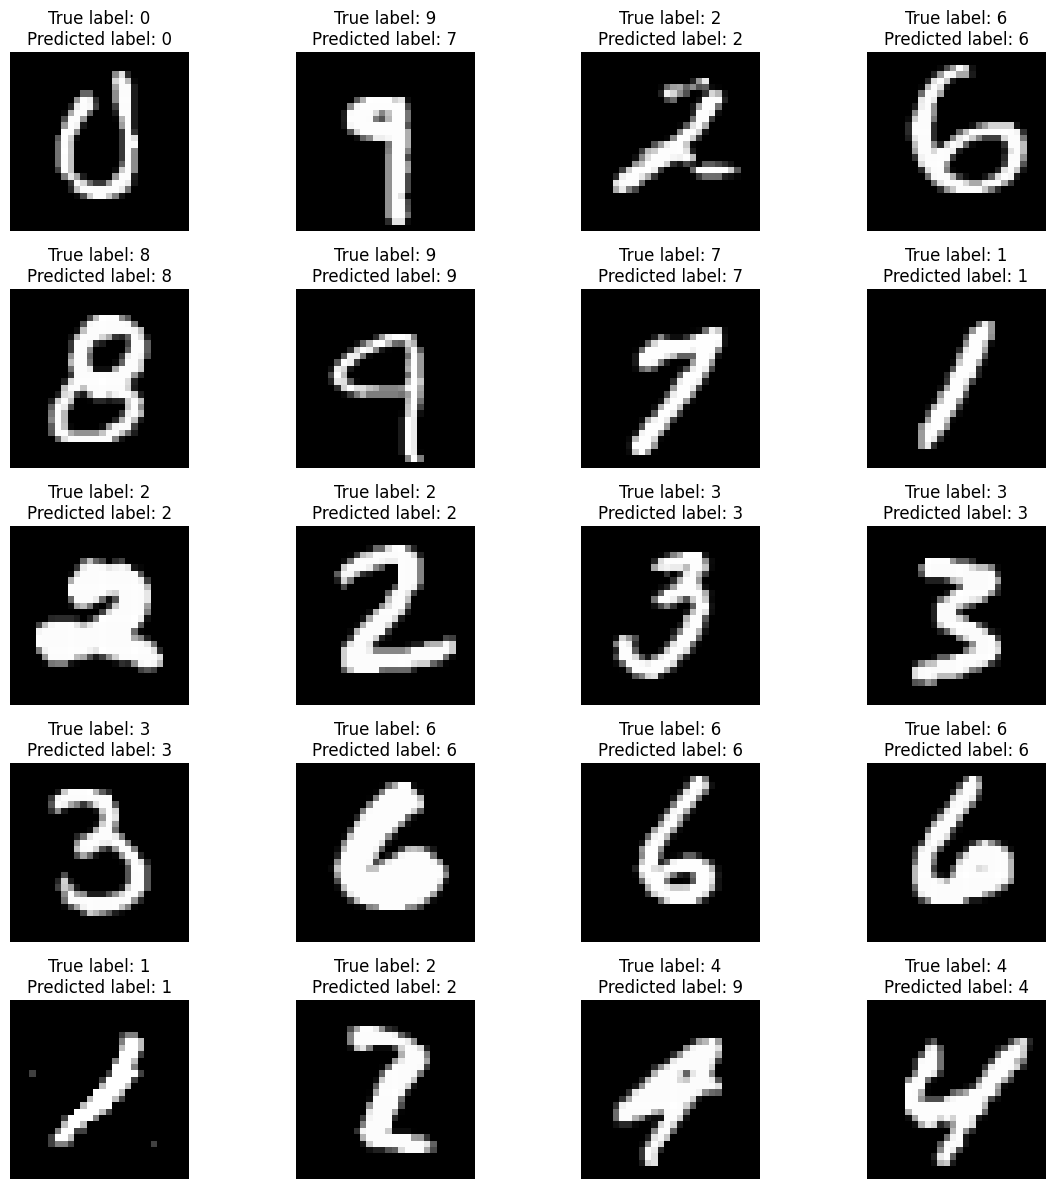

In [7]:
# Define the number of images to display
num_images = int(input('Nhập số ảnh muốn xem: '))

# Compute the number of rows and columns in the grid
num_rows = int(np.ceil(np.sqrt(num_images)))
num_cols = int(np.ceil(num_images / num_rows))

# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
axes = axes.flatten()

# Loop over the specified number of random test images
for i in range(num_images):
    index = np.random.randint(X_test.shape[0])
    image = X_test[index].reshape((28,28))
    hog_features = hog_test[index]
    true_label = y_test[index]
    predicted_label = clf.predict([hog_features])[0]
    
    # Plot the image with the true and predicted labels
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'True label: {true_label}\nPredicted label: {predicted_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
